In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_df=pd.read_csv('heart_2020_cleaned.csv')

In [3]:
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
heart_df.duplicated().sum()

18078

In [7]:
heart_df.shape

(319795, 18)

In [8]:
heart_df.drop_duplicates(inplace=True)

In [9]:
heart_df.shape

(301717, 18)

In [10]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [11]:
for col in heart_df:
    unique_val=heart_df[col].unique()
    unique_count=len(unique_val)
    if unique_count <=13:
        print(f'the number of unique values in coulmn "--"{col}"--" is :{unique_count} and they are : {unique_val}')
    else:
        print(f'the number of values in the feature {col} is : {unique_val}')

the number of unique values in coulmn "--"HeartDisease"--" is :2 and they are : ['No' 'Yes']
the number of values in the feature BMI is : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
the number of unique values in coulmn "--"Smoking"--" is :2 and they are : ['Yes' 'No']
the number of unique values in coulmn "--"AlcoholDrinking"--" is :2 and they are : ['No' 'Yes']
the number of unique values in coulmn "--"Stroke"--" is :2 and they are : ['No' 'Yes']
the number of values in the feature PhysicalHealth is : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
the number of values in the feature MentalHealth is : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
the number of unique values in coulmn "--"DiffWalking"--" is :2 and they are : ['No' 'Yes']
the number of unique values in coulmn "--"Sex"--" is :2 and they are : ['Female' 'Male']
the 

In [12]:
def drawBoxPlot(col):
    sns.boxplot(y=col,data=heart_df)
    

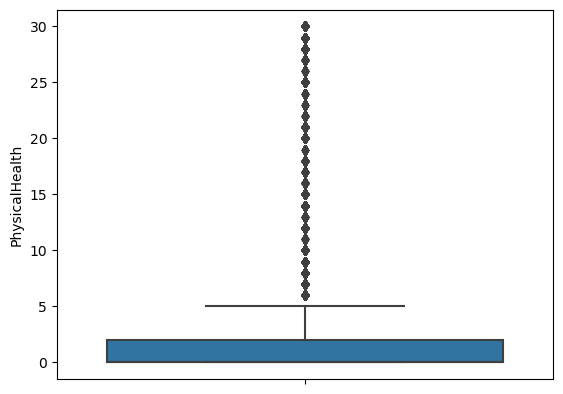

In [13]:
drawBoxPlot('PhysicalHealth')

In [14]:
def Remove_outliers(col_name):
    q1=heart_df[col_name].quantile(0.25)
    q3=heart_df[col_name].quantile(0.75)
    iqr=q3-q1
    heart_df[col_name][(heart_df[col_name]<(q1-iqr*1.5))|(heart_df[col_name]>(q3+1.5*iqr))]=np.nan

In [15]:
Remove_outliers('PhysicalHealth')

C:\Users\PC\AppData\Local\Temp\ipykernel_19656\1824804246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df[col_name][(heart_df[col_name]<(q1-iqr*1.5))|(heart_df[col_name]>(q3+1.5*iqr))]=np.nan


In [16]:
heart_df.isnull().sum()

HeartDisease            0
BMI                     0
Smoking                 0
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      47136
MentalHealth            0
DiffWalking             0
Sex                     0
AgeCategory             0
Race                    0
Diabetic                0
PhysicalActivity        0
GenHealth               0
SleepTime               0
Asthma                  0
KidneyDisease           0
SkinCancer              0
dtype: int64

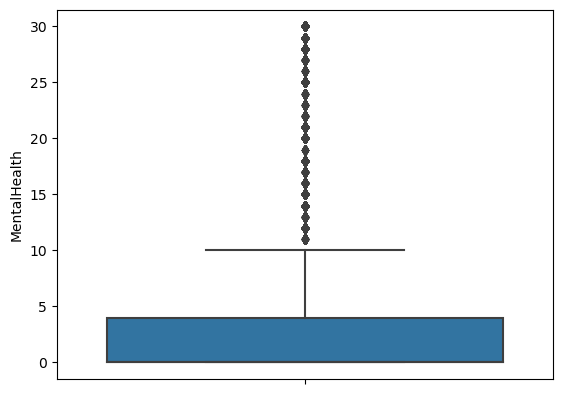

In [17]:
drawBoxPlot('MentalHealth')

In [18]:
Remove_outliers('MentalHealth')

C:\Users\PC\AppData\Local\Temp\ipykernel_19656\1824804246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df[col_name][(heart_df[col_name]<(q1-iqr*1.5))|(heart_df[col_name]>(q3+1.5*iqr))]=np.nan


In [19]:
heart_df.isnull().sum()

HeartDisease            0
BMI                     0
Smoking                 0
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      47136
MentalHealth        39713
DiffWalking             0
Sex                     0
AgeCategory             0
Race                    0
Diabetic                0
PhysicalActivity        0
GenHealth               0
SleepTime               0
Asthma                  0
KidneyDisease           0
SkinCancer              0
dtype: int64

In [20]:
heart_df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


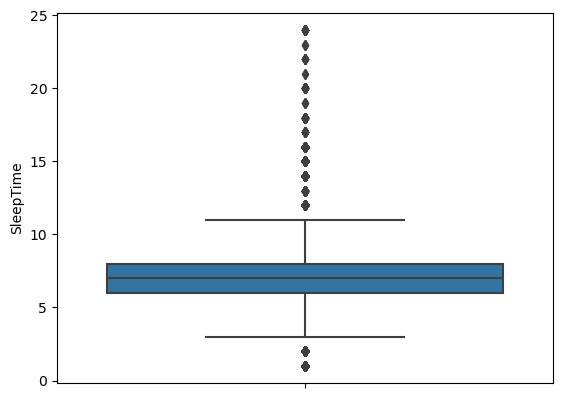

In [21]:
drawBoxPlot('SleepTime')

In [22]:
Remove_outliers('SleepTime')

C:\Users\PC\AppData\Local\Temp\ipykernel_19656\1824804246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df[col_name][(heart_df[col_name]<(q1-iqr*1.5))|(heart_df[col_name]>(q3+1.5*iqr))]=np.nan


In [23]:
heart_df.isnull().sum()

HeartDisease            0
BMI                     0
Smoking                 0
AlcoholDrinking         0
Stroke                  0
PhysicalHealth      47136
MentalHealth        39713
DiffWalking             0
Sex                     0
AgeCategory             0
Race                    0
Diabetic                0
PhysicalActivity        0
GenHealth               0
SleepTime            4542
Asthma                  0
KidneyDisease           0
SkinCancer              0
dtype: int64

In [24]:
heart_df['SleepTime'].describe()

count    297175.000000
mean          7.043405
std           1.260587
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: SleepTime, dtype: float64

In [25]:
heart_df.dropna(inplace=True)

In [26]:
heart_df.shape

(227555, 18)

In [27]:
def Change_type(col_name):
    heart_df.loc[heart_df[col_name]=="Yes",col_name]=1
    heart_df.loc[heart_df[col_name]=="No",col_name]=0
    heart_df[col_name]=heart_df[col_name].astype('int')
    print(heart_df[col_name])

In [28]:
Change_type('HeartDisease')

1         0
3         0
7         0
8         0
9         0
         ..
319788    0
319789    0
319791    0
319792    0
319794    0
Name: HeartDisease, Length: 227555, dtype: int32


In [29]:
Change_type('Smoking')

1         0
3         0
7         1
8         0
9         0
         ..
319788    0
319789    0
319791    1
319792    0
319794    0
Name: Smoking, Length: 227555, dtype: int32


In [30]:
#heart_df.loc[heart_df['Sex']=='Male','Sex']=0
#heart_df.loc[heart_df['Sex']=='Female','Sex']=1
#heart_df['Sex']=heart_df['Sex'].astype('int32')
#heart_df['Sex']

In [34]:
heart_df['AgeCategory'].value_counts()

65-69          24213
60-64          23028
70-74          22519
55-59          20297
80 or older    17764
50-54          17680
75-79          15870
45-49          15634
40-44          15201
35-39          14874
18-24          14664
30-34          13623
25-29          12188
Name: AgeCategory, dtype: int64

In [35]:
convertion_dict={"Yes":1,
                 "No":0,
                 "No, borderline diabetes":0,
                 'Yes (during pregnancy)':1,
                 'Male':1,
                 'Female':0,
                 '80 or older':80,
                 'White':0,
                 'Black':1,
                 'Hispanic':2,
                 'Other':3,
                 'Asian':4,
                 'American Indian/Alaskan Native':5
                 
                 
                }
heart_df=heart_df[heart_df.columns].replace(convertion_dict)
heart_df=heart_df.apply(pd.to_numeric,errors="ignore")

In [36]:
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,80,0,0,1,Very good,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,0,0,0,Good,6.0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,80,0,1,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,80,0,0,0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,65-69,0,0,1,Good,10.0,0,0,0


In [38]:
heart_df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [40]:
heart_df['SleepTime']=heart_df['SleepTime'].astype(float)

array([[<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoking'}>,
        <AxesSubplot:title={'center':'AlcoholDrinking'}>],
       [<AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>,
        <AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'DiffWalking'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Diabetic'}>,
        <AxesSubplot:title={'center':'PhysicalActivity'}>],
       [<AxesSubplot:title={'center':'SleepTime'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'KidneyDisease'}>,
        <AxesSubplot:title={'center':'SkinCancer'}>]], dtype=object)

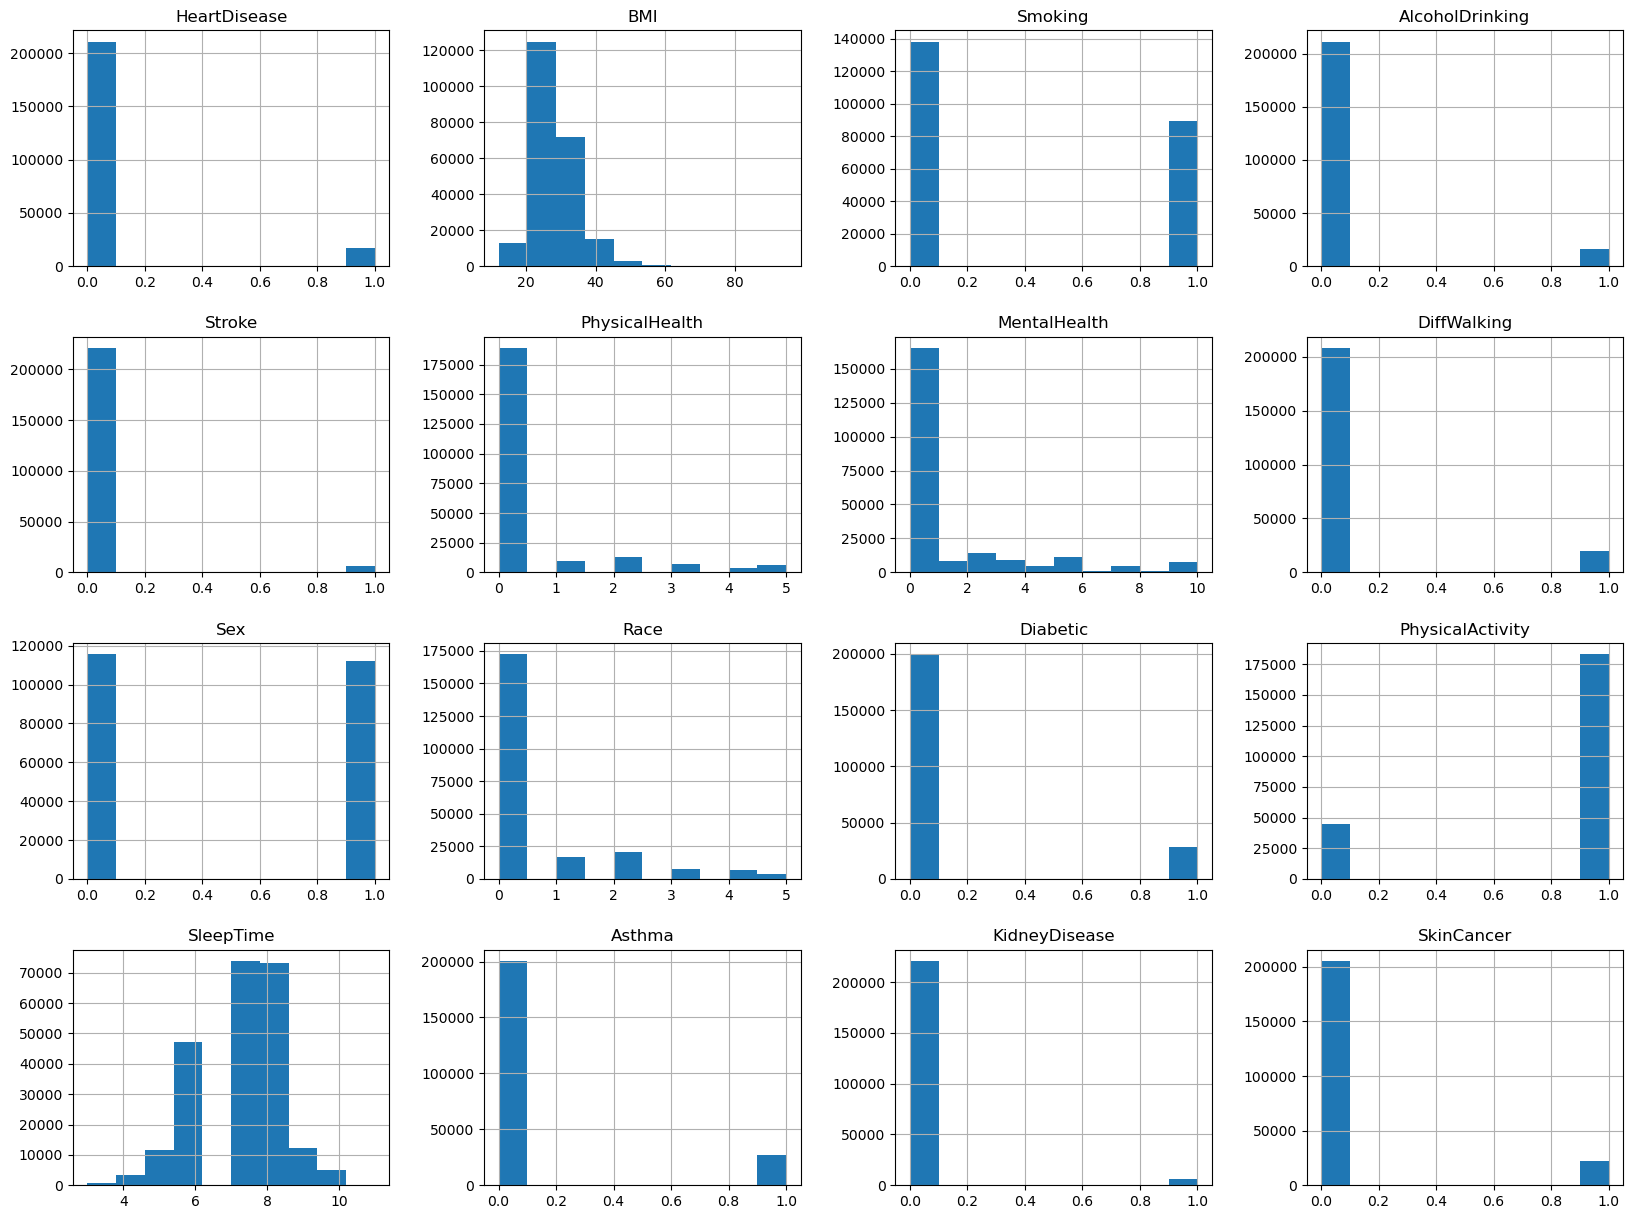

In [41]:
heart_df.hist(figsize=(20,15))

<AxesSubplot:>

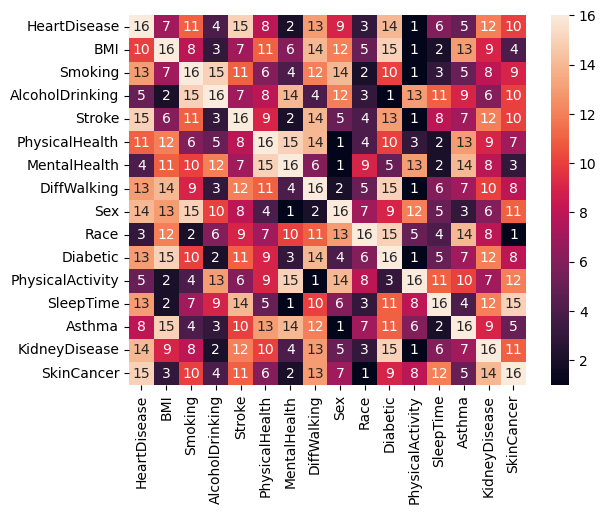

In [42]:
#mask = np.triu(np.ones_like(heart_df.corr(), dtype=bool))
sns.heatmap(heart_df.corr().rank(axis=1),annot=True,)
#sns.heatmap(heart_df.corr(),fmt='0.0f',annot=True) #there is an error


In [45]:
class Visualziation:
    def count_plot(col_name1,col_name2):# if you want to see a column according to another
        plt.figure(figsize=(15,10))
        sns.countplot(x=heart_df[col_name1],hue=heart_df[col_name2])
        plt.xlabel(col_name2)
        plt.legend(['Normal',col_name1])
        plt.ylabel('Frequency')
        plt.show()
    def count_plot1(col_name1): #if you just want to see the values of a spacific column
        plt.figure(figsize=(15,10))
        sns.countplot(x=heart_df[col_name1])
        plt.xlabel(col_name1)
        plt.legend(['Normal',col_name1])
        plt.ylabel('Frequency')
        plt.show()
    #def distribution(column1_name,column2_name,class_label):
        #num of female and male have-------------------Heartdisese
     #   Have_DeartDisease_column2_name=heart_df.DataFrame(heart_df[heart_df[column1_name]==class_label][column2_name])
      #  print(Have_DeartDisease_column2_name.value_counts())
       # Have_DeartDisease_column2_name.hist(figsize=(20,15))
        #return plt.show()
    def Subplot_Histogram(column1_name,column2_name):
        fig, ax = plt.subplots(figsize = (13,6))
        ax.hist(heart_df[heart_df[column1_name]==1][column2_name], bins=25,alpha=1 ,color="blue", label="HeartDisease")
        ax.hist(heart_df[heart_df[column1_name]==0][column2_name], bins=25,alpha=.5 ,color="green", label="Normal")
        ax.set_xlabel(column2_name)
        ax.set_ylabel("Frequency")
        fig.suptitle(f"Distribution of Cases with Yes/No heartdisease according to {column2_name} ")
        ax.legend()
        
    def Subplot_Histogramm(col_name1,col_name2):
        fig , ax = plt.subplots(figsize=(15,6))
        ax.hist(heart_df[heart_df[col_name1]==1][col_name2],bins=20,alpha=1,color='black',label="HeartDisease")
        ax.hist(heart_df[heart_df[col_name1]==0][col_name2],bins=20,alpha=0.6,color='green',label="Normal")
        ax.set_xlabel(col_name2)
        ax.set_ylabel("Frequancy")
        ax.legend()

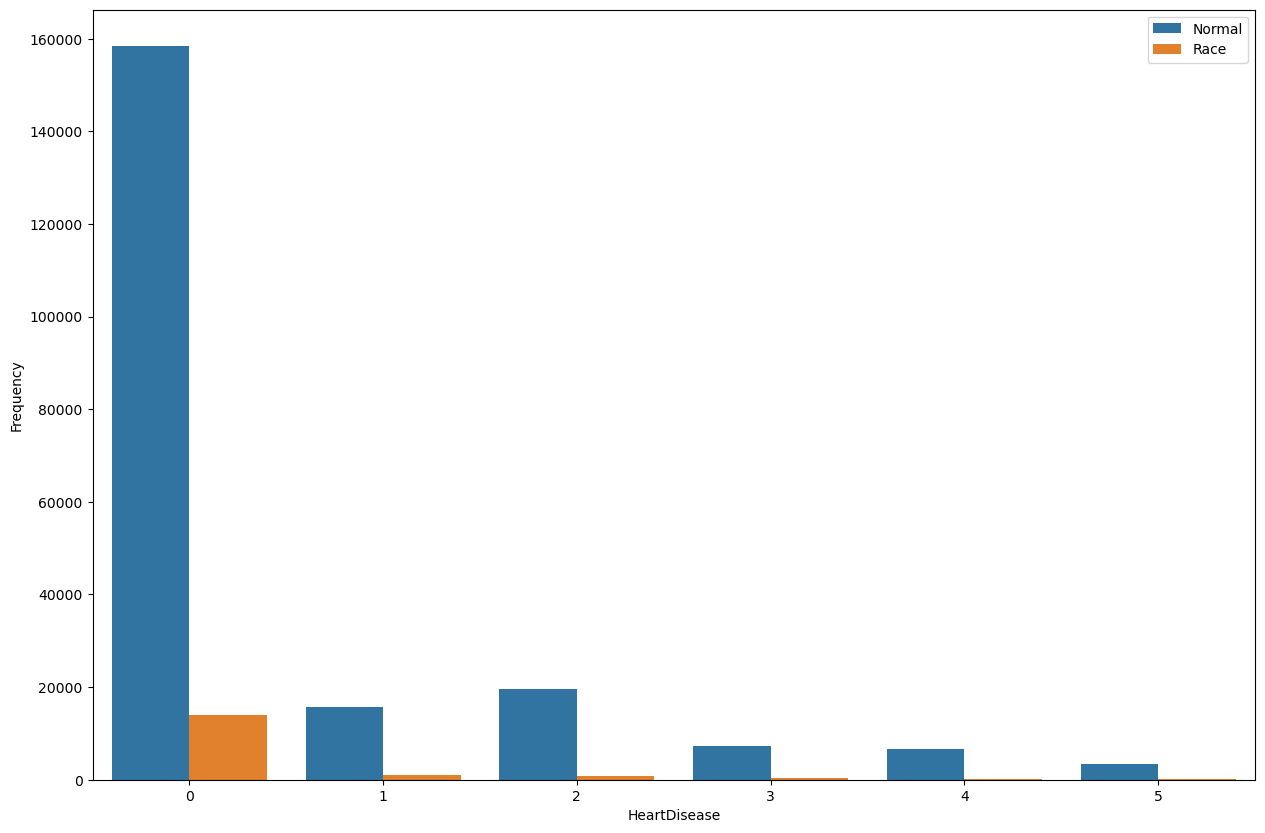

In [46]:
#vis=Vissualziation()
Visualziation.count_plot('Race','HeartDisease')


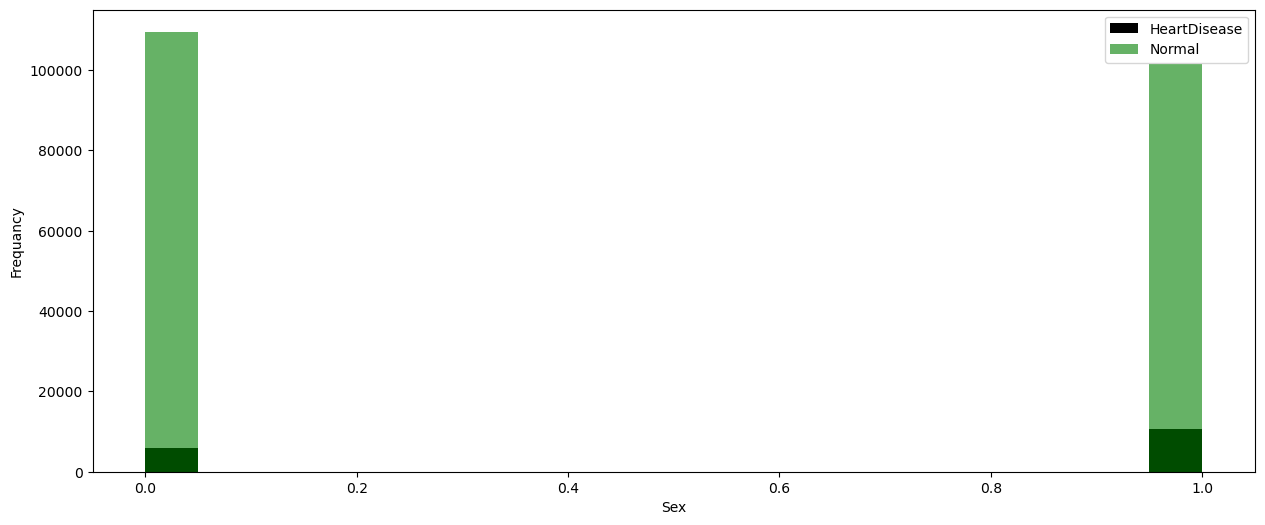

In [47]:
Visualziation.Subplot_Histogramm("HeartDisease","Sex")

In [56]:
cat_col=heart_df.select_dtypes(['object']).columns
cat_col

Index(['AgeCategory', 'GenHealth'], dtype='object')

In [65]:
heart_df1=pd.get_dummies(heart_df,columns=cat_col[1:])
heart_df1['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler
x=heart_df1.drop(['HeartDisease','AgeCategory'],axis=1)
y=heart_df1['HeartDisease']
x=StandardScaler().fit(x).transform(x)

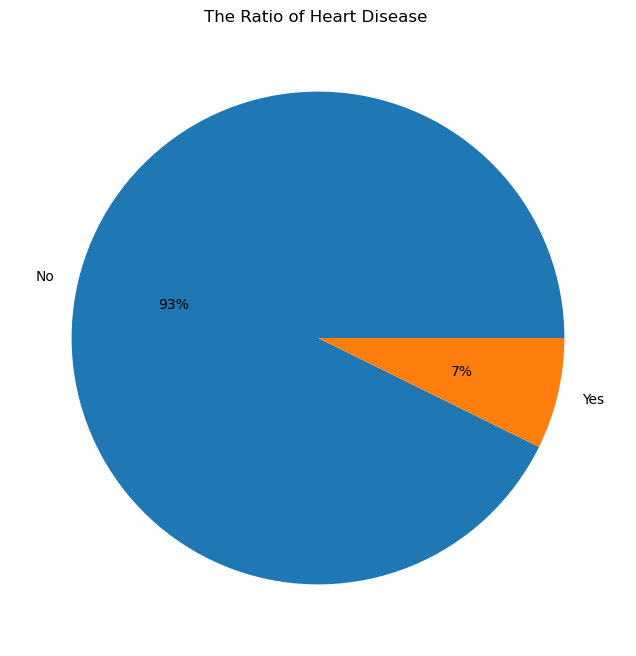

In [68]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
x,y = over.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, stratify=y)

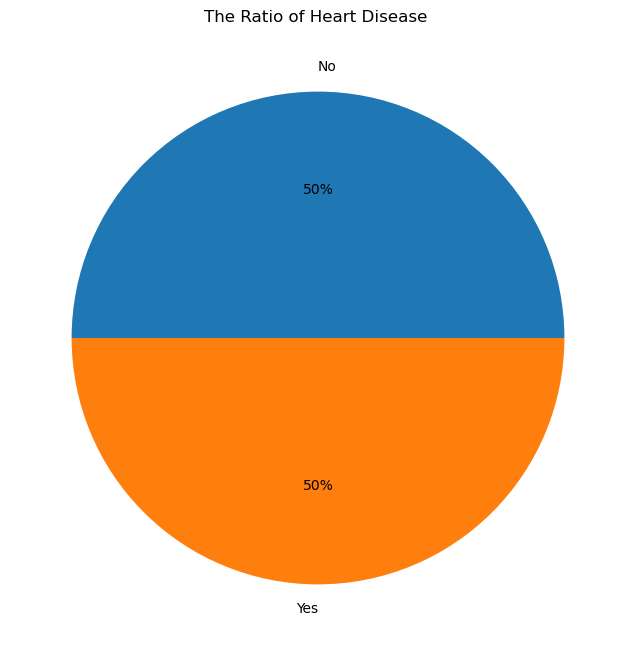

In [73]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics



models = {
    "Decision Tree":DecisionTreeClassifier(random_state = 44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state = 44),
    "Naive Bayes C":BernoulliNB(),
    "SVC":SVC(kernel='linear',max_iter=100,C=1.0,gamma='auto'),
    "Random Forest":RandomForestClassifier(random_state = 44, max_depth=20)
}
results = pd.DataFrame(columns=['Model','Recall TP/TP+FN','Precision TP/TP+FP','f1-score','accuracy TP+TN)/all'])
def Test_models(X_train,X_test,y_train,y_test):
    for model in models :
        fit=models[model].fit(X_train,y_train)
        fig,ax=plt.subplots(figsize=(7,7))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit,X_test,y_test,cmap='Blues',normalize='true',ax=ax)
       # metrics.plot_confusion_matrix(fit,X_train,y_train,cmap='Reds',normalize='true',ax=ax)
        plt.show()
        
        
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2) # TP /(TP + FN)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2) # TP /(TP + FP)   
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2) # F1 = 2 * (precision * recall) / (precision + recall)
        accuracy = accuracy_score(y_test, fit.predict(X_test), normalize=True) # ((TP + TN)/(TP + TN + FP + FN))
        results.loc[len(results.index)] = [model, recall, precision, f1, accuracy]
    

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


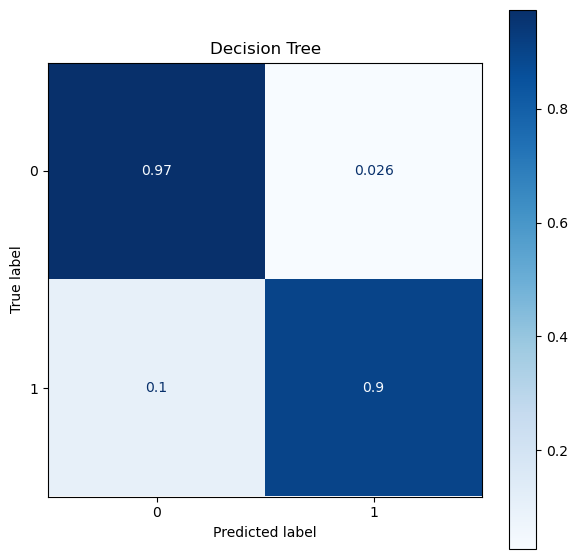

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


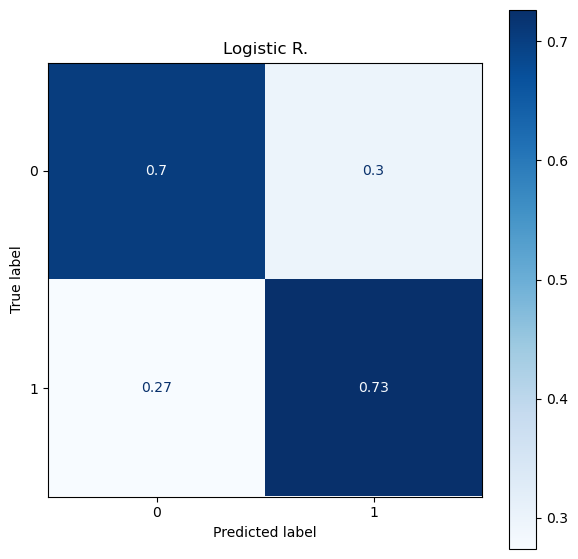

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


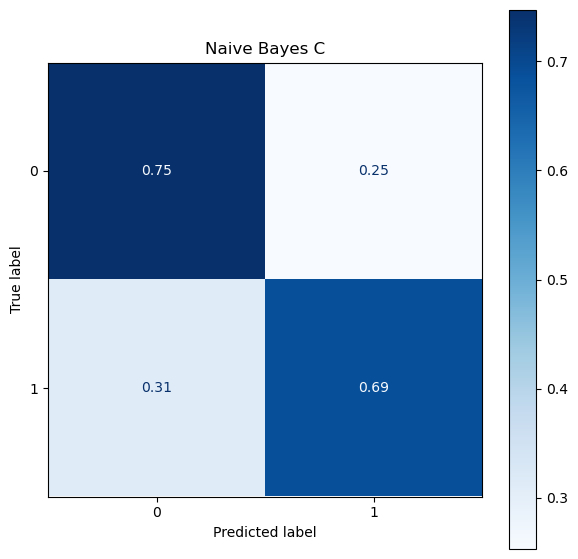

C:\Users\PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


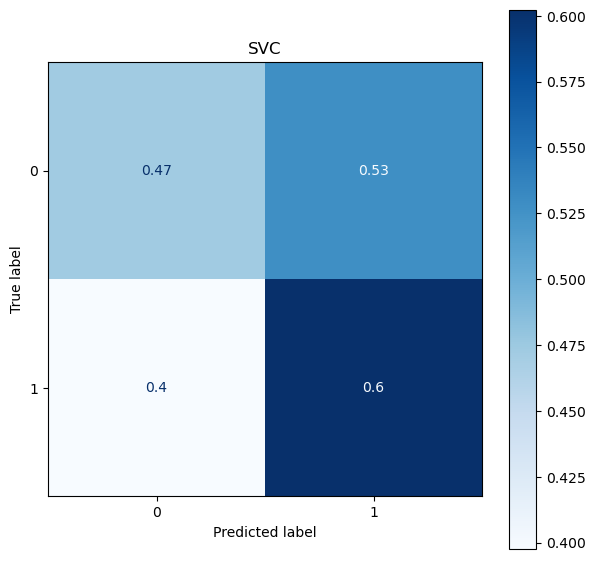

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


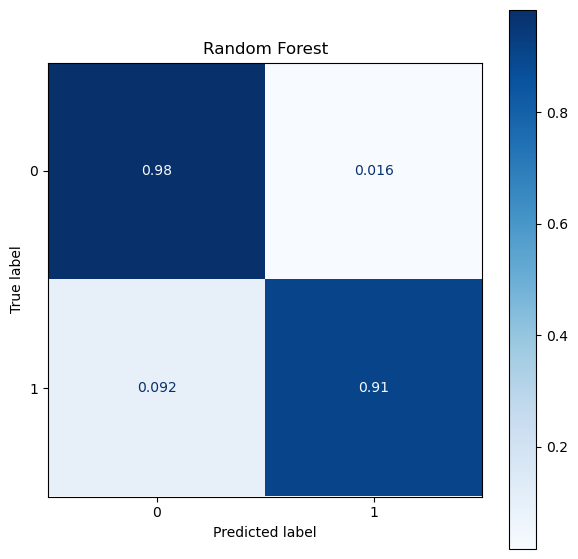

In [84]:
Test_models(X_train, X_test, y_train, y_test)

In [88]:
results.sort_values('accuracy TP+TN)/all', ascending=False)

,Model,Recall TP/TP+FN,Precision TP/TP+FP,f1-score,accuracy TP+TN)/all
4,Random Forest,90.83,98.26,94.40,0.946092
0,Decision Tree,89.87,97.17,93.38,0.936291
2,Naive Bayes C,68.72,73.08,70.83,0.717008
1,Logistic R.,72.61,70.97,71.78,0.714567
3,SVC,60.23,53.32,56.57,0.537555
